/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30913 (\N{CJK UNIFIED IDEOGRAPH-78C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24322 (\

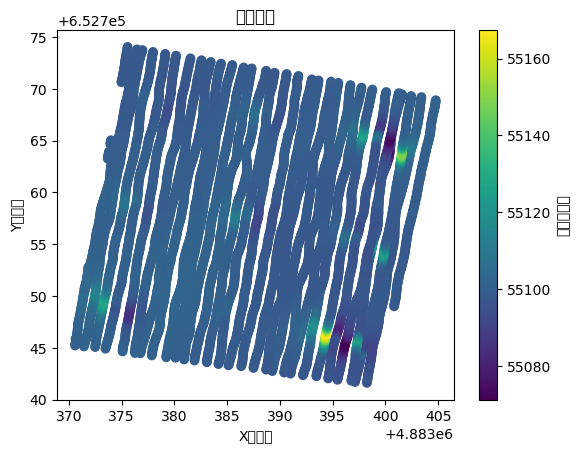

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取包含X、Y和磁异常大小的CSV文件
file_path = 'data.csv'
data = pd.read_csv(file_path)

# 提取X、Y和磁异常数据列
x_values = data['X']
y_values = data['Y']
magnetic_anomaly = data['Mag']

# 绘制磁异常图
plt.scatter(x_values, y_values, c=magnetic_anomaly, cmap='viridis', marker='o')
plt.colorbar(label='磁异常大小')  # 添加颜色条，表示磁异常大小
plt.title('磁异常图')
plt.xlabel('X轴坐标')
plt.ylabel('Y轴坐标')
plt.show()


In [11]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np

# 读取包含X、Y和磁异常大小的CSV文件
file_path = 'data.csv'
data = pd.read_csv(file_path)

# 提取X、Y和磁异常数据列
x_values = data['X']
y_values = data['Y']
magnetic_anomaly = data['Mag']

# 定义网格坐标
grid_x, grid_y = np.mgrid[min(x_values):max(x_values):1000j, min(y_values):max(y_values):1000j]
print(grid_x.shape)
print(grid_y.shape)

# 进行插值操作
grid_z = griddata((x_values, y_values), magnetic_anomaly, (grid_x, grid_y), method='linear')
print(grid_z.shape)


par_window = 100  # 24 to have a better look
zmax = 1000
map_lenght = 250
X = np.linspace(-map_lenght, map_lenght, zmax)
Y = np.linspace(-map_lenght, map_lenght, zmax)


(1000, 1000)
(1000, 1000)
(1000, 1000)
(100, 100)


In [ ]:
from matplotlib.figure import Figure

fig = Figure(facecolor='none')  # 创建一个背景透明的Figure对象
ax = fig.add_subplot(111)  # 添加子图
ax.imshow(grid_z, cmap='gray', interpolation='nearest')
ax.set_axis_off()  # 移除坐标轴
fig.patch.set_alpha(0)  # 设置Figure背景透明度
plt.show()

# 或者直接在现有plt环境下操作
fig, ax = plt.subplots(facecolor='none')  # 创建背景透明的子图
ax.imshow(grid_z, cmap='gray', interpolation='nearest')
ax.axis('off')
fig.patch.set_alpha(0)
plt.show()

In [38]:
import os
os.getcwd()

'/home/jiajianhao/文档/cnn/Magnetic_methods-master/mydata'

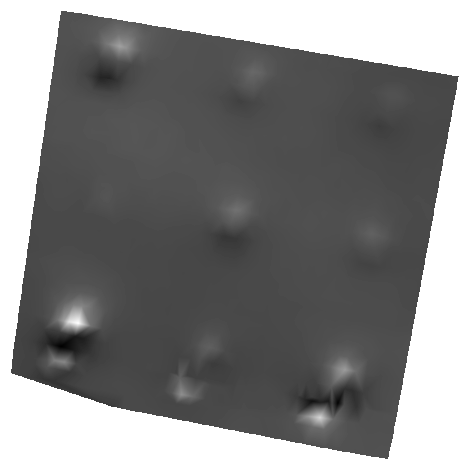

In [41]:
plt.figure(facecolor='')
plt.imshow(grid_z, cmap='gray')  # 使用 viridis 颜色映射方案
plt.axis('off')
plt.tight_layout()
plt.show()  # 显示图像

In [19]:
def rearrange_final(X_data_array):

    X_data_array_final = X_data_array.reshape(
        X_data_array.shape[0], X_data_array.shape[1], 1)



    return X_data_array_final

In [22]:
import cv2
from PIL import Image

In [20]:
X_array = rearrange_final(grid_z)

In [23]:
image = (X_array[:, :, :] - np.min(X_array[:, :, :])) / (
    np.max(X_array[:, :, :]) - np.min(X_array[:, :, :]))

# Converting to rgb

image_t = np.uint8(image * 255)
image_t = cv2.cvtColor(image_t, cv2.COLOR_GRAY2RGB)

# Saving image

im = Image.fromarray(image_t)
im.save(f"mydata.jpg")